In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 

In [2]:
# 1. Load dataset 
 
data= pd.read_csv("dataCleaned.csv")
data.head()
data.columns

Index(['     ', 'Age ', 'JobLevel            ', 'JobInvolvement ',
       'JobSatisfaction ', 'MonthlyIncome           ', 'TotalWorkingYears ',
       'YearsAtCompany ', 'YearsInCurrentRole ', 'YearsSinceLastPromotion ',
       'YearsWithCurrManager ', 'DistanceFromHome ', 'Education ',
       'EnvironmentSatisfaction ', 'RelationshipSatisfaction ',
       'WorkLifeBalance ', 'NumCompaniesWorked ', 'PercentSalaryHike ',
       'PerformanceRating ', 'StockOptionLevel ', 'TrainingTimesLastYear ',
       'Attrition ', 'Gender_Female ', 'Gender_Male ',
       'MaritalStatus_Divorced ', 'MaritalStatus_Married ',
       'MaritalStatus_Single ', 'Department_Human Resources ',
       'Department_Research & Development ', 'Department_Sales ',
       'JobRole_Healthcare Representative ', 'JobRole_Human Resources ',
       'JobRole_Laboratory Technician ', 'JobRole_Manager ',
       'JobRole_Manufacturing Director ', 'JobRole_Research Director ',
       'JobRole_Research Scientist ', 'JobRole_Sal

In [3]:
# 4. Split data 
data.columns=data.columns.str.strip()
X = data.drop("Attrition", axis=1)  
y = data["Attrition"]
 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.2, random_state=42 
) 

In [4]:
# 5. Hyperparameter Tuning 
 
params = { 
    "criterion": ["gini", "entropy"], 
    "max_depth": [3, 5, 7, 10, None], 
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 4] 
} 
 
dt = DecisionTreeClassifier(random_state=42) 
 
grid = GridSearchCV(dt, params, cv=5, scoring="accuracy", n_jobs=-1) 
grid.fit(X_train, y_train) 
 
print("\nBest Parameters:", grid.best_params_) 
print("Best Accuracy:", grid.best_score_) 


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy: 0.8426649837720881


In [5]:
# 6. Train final model 
 
best_tree = grid.best_estimator_ 
best_tree.fit(X_train, y_train) 
 
y_pred = best_tree.predict(X_test) 
 
print("\nClassification Report:") 
print(classification_report(y_test, y_pred)) 


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       255
           1       0.27      0.21      0.23        39

    accuracy                           0.82       294
   macro avg       0.57      0.56      0.56       294
weighted avg       0.80      0.82      0.81       294



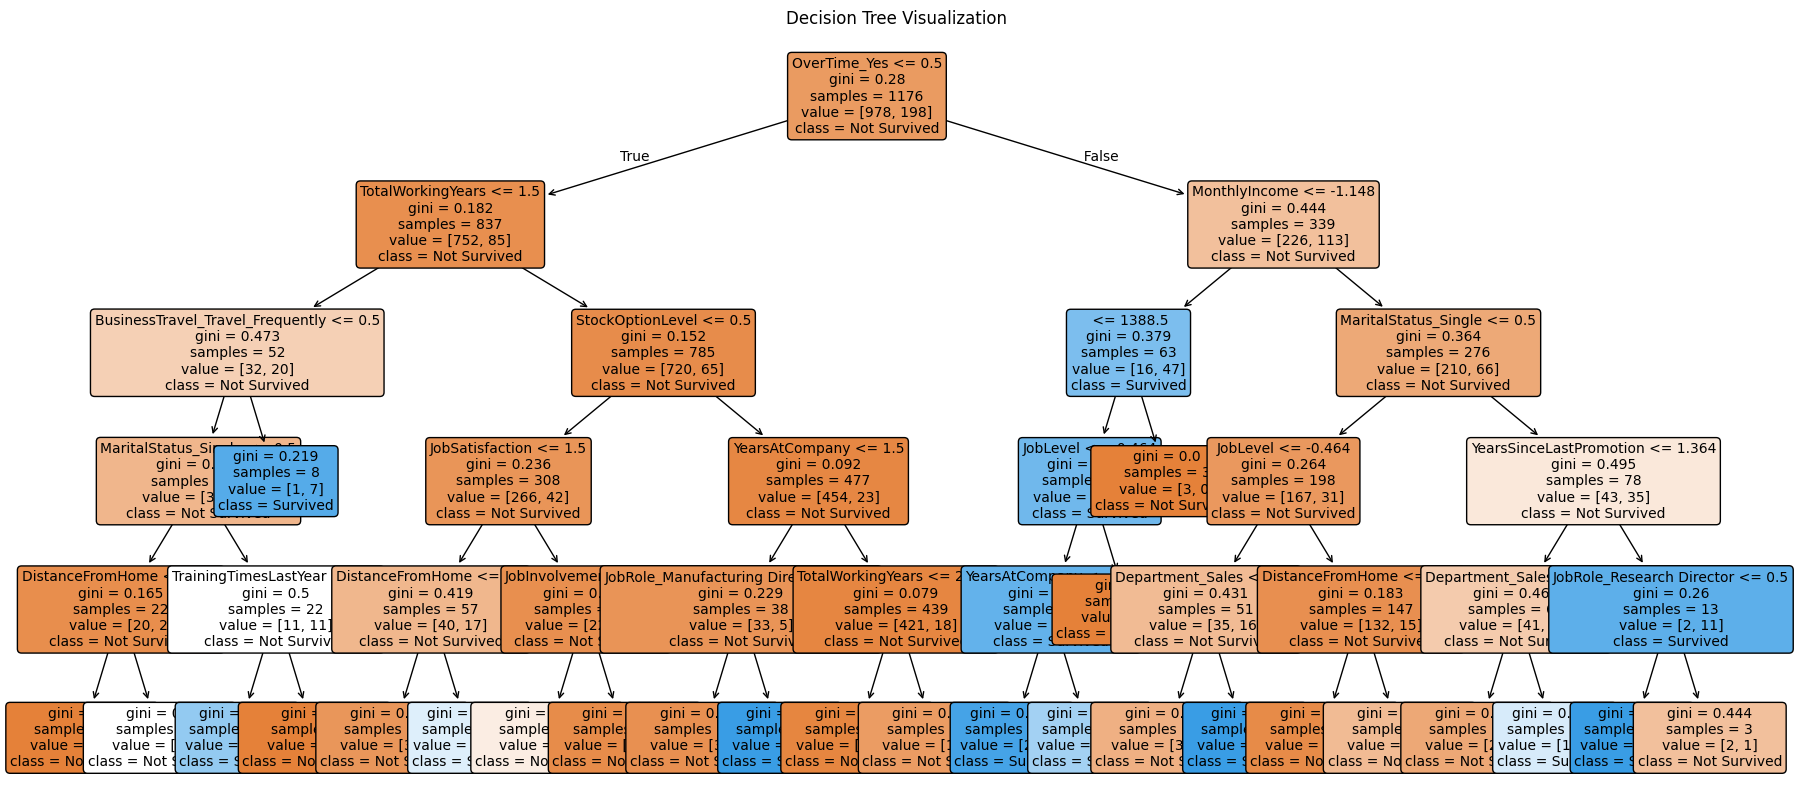

In [6]:
# 7. Plot the decision tree 
 
plt.figure(figsize=(22, 10)) 
plot_tree( 
    best_tree, 
    feature_names=X.columns, 
    class_names=["Not Survived", "Survived"], 
    filled=True, 
    rounded=True, 
    fontsize=10 
) 
plt.title("Decision Tree Visualization") 
plt.show() 

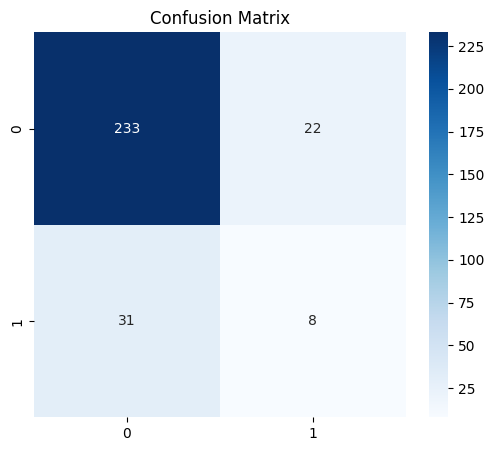

In [7]:
# 8. Confusion Matrix 
 
plt.figure(figsize=(6, 5)) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues') 
plt.title("Confusion Matrix") 
plt.show() 